<a href="https://colab.research.google.com/github/JamesLeeeeeee/machineLearning_practice/blob/master/20211101_%EC%9D%B4%EC%9E%AC%EA%B4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 08-2

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64,kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

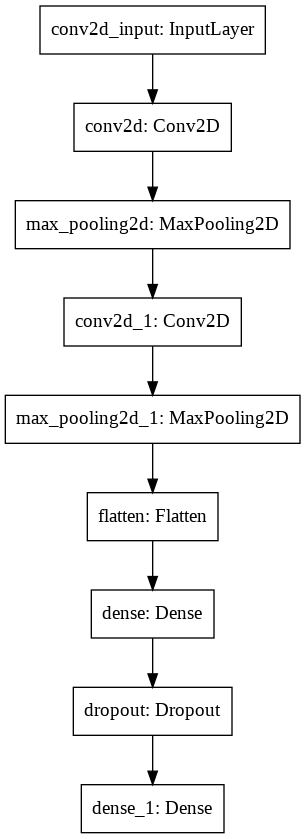

In [8]:
keras.utils.plot_model(model)

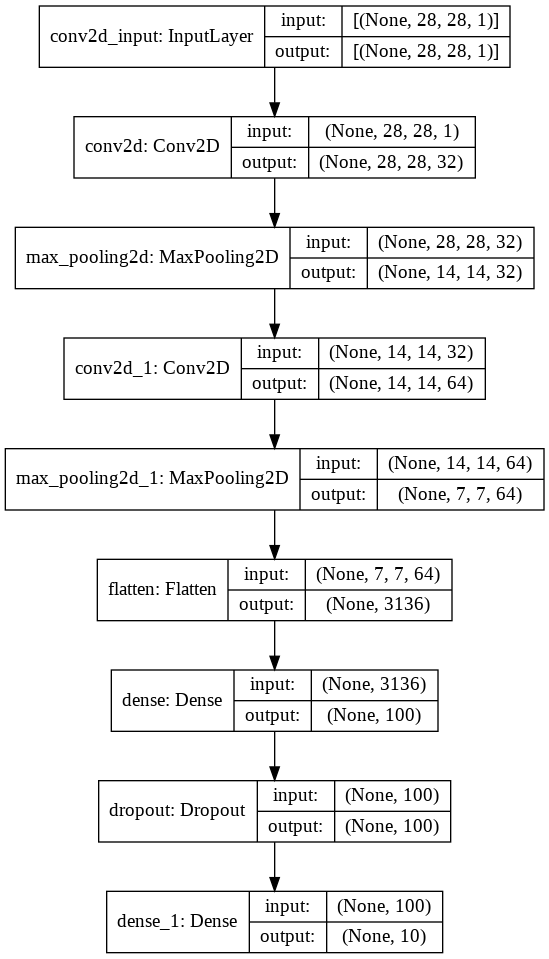

In [9]:
keras.utils.plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb= keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb= keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.5171 - accuracy: 0.8151 - val_loss: 0.3367 - val_accuracy: 0.8754
Epoch 2/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.3365 - accuracy: 0.8790 - val_loss: 0.2692 - val_accuracy: 0.8998
Epoch 3/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.2870 - accuracy: 0.8958 - val_loss: 0.2480 - val_accuracy: 0.9043
Epoch 4/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2562 - accuracy: 0.9073 - val_loss: 0.2388 - val_accuracy: 0.9113
Epoch 5/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2312 - accuracy: 0.9154 - val_loss: 0.2284 - val_accuracy: 0.9135
Epoch 6/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.2107 - accuracy: 0.9240 - val_loss: 0.2427 - val_accuracy: 0.9130
Epoch 7/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1911 - accuracy: 0.9291 - val_loss: 0.2223 -

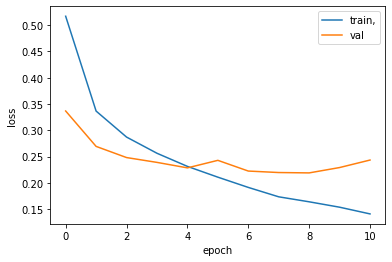

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train,', 'val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2188 - accuracy: 0.9234


[0.21876925230026245, 0.9234166741371155]

<function matplotlib.pyplot.show>

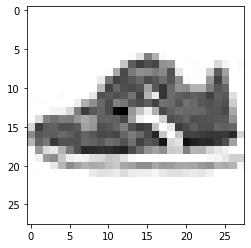

In [41]:
plt.imshow(val_scaled[11].reshape(28,28), cmap='gray_r')
plt.show

In [42]:
pred=model.predict(val_scaled[:12])
print(pred)

[[1.75676489e-20 6.75366642e-34 1.30740235e-25 1.38196785e-24
  1.66603779e-23 4.71029517e-24 7.64190082e-21 1.19675405e-19
  1.00000000e+00 1.15015991e-21]
 [7.22481488e-08 3.40671622e-17 2.09634688e-11 3.56400632e-15
  3.32394596e-15 1.99086353e-14 1.52388546e-10 1.75249382e-13
  9.99999881e-01 1.17549538e-15]
 [3.09401976e-10 9.67695095e-14 1.63695077e-12 3.15224951e-12
  4.76444856e-11 4.62837306e-07 1.81888543e-12 9.99974847e-01
  2.50734633e-12 2.46632935e-05]
 [3.29568793e-05 3.55063641e-08 2.82550063e-02 1.54409663e-05
  8.33841383e-01 9.92548890e-11 1.37852684e-01 1.82346360e-11
  2.39397514e-06 7.79776510e-09]
 [6.36949056e-17 1.57220811e-21 1.67681562e-20 6.06009987e-17
  2.17423018e-18 2.13121219e-15 7.90487333e-20 6.73119227e-10
  1.00000000e+00 1.27213898e-15]
 [5.76197908e-06 3.04799357e-07 2.47626957e-02 1.79009032e-06
  9.54121530e-01 1.96282678e-11 2.11078506e-02 6.14756033e-12
  1.31233548e-07 3.59605288e-08]
 [1.65662044e-08 1.00000000e+00 7.02425444e-12 4.75042672e

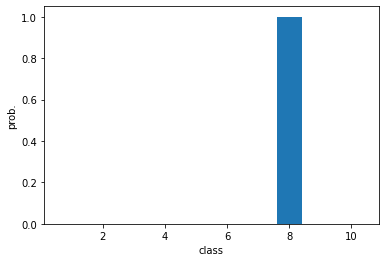

In [44]:
plt.bar(range(1,11), pred[11])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [28]:
classes=['티셔츠', '바지', '스웨터', '드레스', '코트','샌달', '셔츠', '스니커즈','가방', '앵글 부츠']

In [45]:
import numpy as np
print(classes[np.argmax(pred[11])])

스니커즈


In [39]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [40]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2453 - accuracy: 0.9148


[0.2452564686536789, 0.9147999882698059]